In [1]:
import pandas as pd
import seaborn as se
import pickle
from collections import Counter
import numpy as np
import os
import pickle
from timeit import timeit
import json
from timeit import default_timer as timer
from pathlib import Path
import shutil
import math
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import pickle
from generate_layer_metrics import ConvLayer, LinearLayer
import logging

logging.getLogger('matplotlib').setLevel(logging.ERROR)


NameError: name 'logging' is not defined

In [6]:
se.set_style("darkgrid")

In [4]:
with open("../data/model_unique_layers_tracker.pickle", "rb") as file:
    model_unique_layers_tracker = pickle.load(file)

Text(0.5, 1.0, 'Per Layer Speedup vs CPU Baseline for mobilenetv3_small_075')

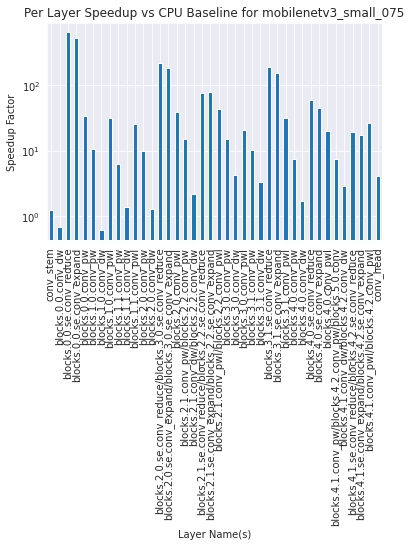

In [182]:
layer_metrics = pd.read_csv('../data/layer_metrics.csv', index_col=[0, 1])
arch_metrics = pd.read_csv('../data/arch_metrics_iofmap_1mb.csv', index_col=[0,1],)

model_name = "mobilenetv3_small_075"
combined_model_metrics = {}
for group_idx, layer_names in model_unique_layers_tracker[model_name].items():
    group_metrics = arch_metrics.loc[([model_name],layer_names), : ].median()
    combined_layer_names = '/'.join(layer_names)
    combined_model_metrics[combined_layer_names] = group_metrics.to_dict()
combined_model_df = pd.DataFrame.from_dict(combined_model_metrics, orient='index')
speedup_plt = combined_model_df.loc[:, 'speedup'].plot(kind='bar')
speedup_plt.set_yscale('log', base=10)
speedup_plt.set_ylabel('Speedup Factor')
speedup_plt.set_xlabel('Layer Name(s)')
speedup_plt.set_title(f"Per Layer Speedup vs CPU Baseline for {model_name}")


Text(0, 0.5, 'Utilization percentage')

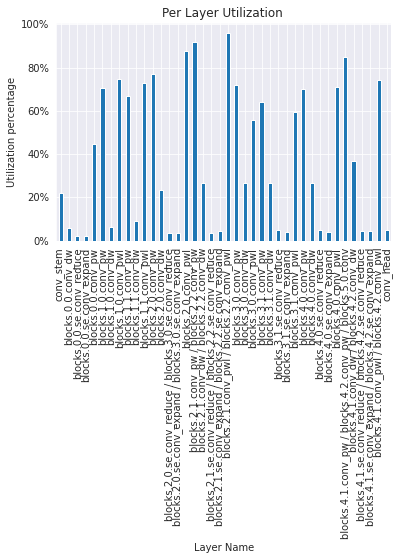

In [183]:
combined_model_metrics = {}
for group_idx, layer_names in model_unique_layers_tracker[model_name].items():
    group_metrics = arch_metrics.loc[([model_name], layer_names), :].median()
    combined_layer_names = " / ".join(layer_names)
    combined_model_metrics[combined_layer_names] = group_metrics.to_dict()
combined_model_df = pd.DataFrame.from_dict(combined_model_metrics, orient="index")

util_plt = combined_model_df.loc[:, "util"].mul(100).plot(kind="bar")
util_plt.set_title("Per Layer Utilization ")
util_plt.yaxis.set_major_formatter(mtick.PercentFormatter())
util_plt.set_xlabel("Layer Name")
util_plt.set_ylabel("Utilization percentage")


Text(0, 0.5, 'Energy in Joules')

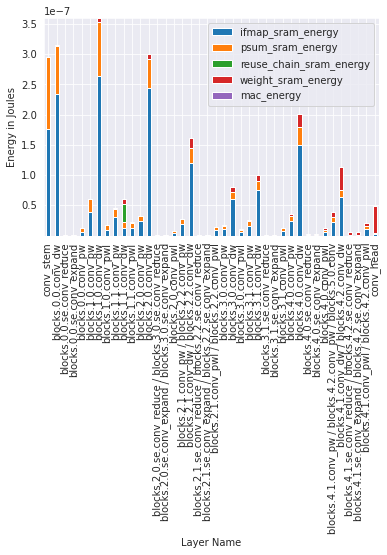

In [233]:
energy_plt = combined_model_df.loc[
    :,
    [
        "ifmap_sram_energy",
        "psum_sram_energy",
        "reuse_chain_sram_energy",
        "weight_sram_energy",
        "mac_energy",
    ],
].plot(kind="bar", stacked=True)
energy_plt.set_xlabel("Layer Name")
energy_plt.set_ylabel("Energy in Joules")